TNG50
[8.00460511e+08 4.38605447e+08 2.96604990e+08 ... 1.26542442e+06
 1.18209846e+06 1.18099188e+06] [1. 1. 1. ... 1. 1. 1.]


ValueError: x contains non-positive values, so can not be log-scaled

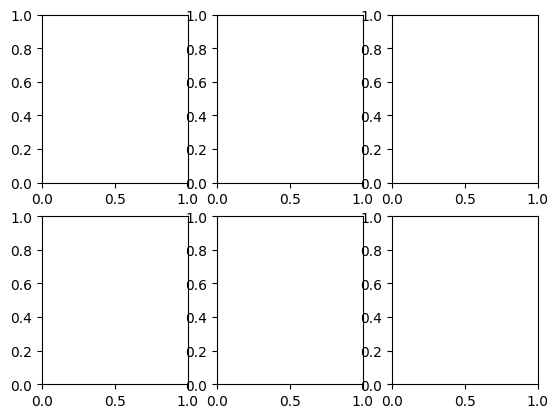

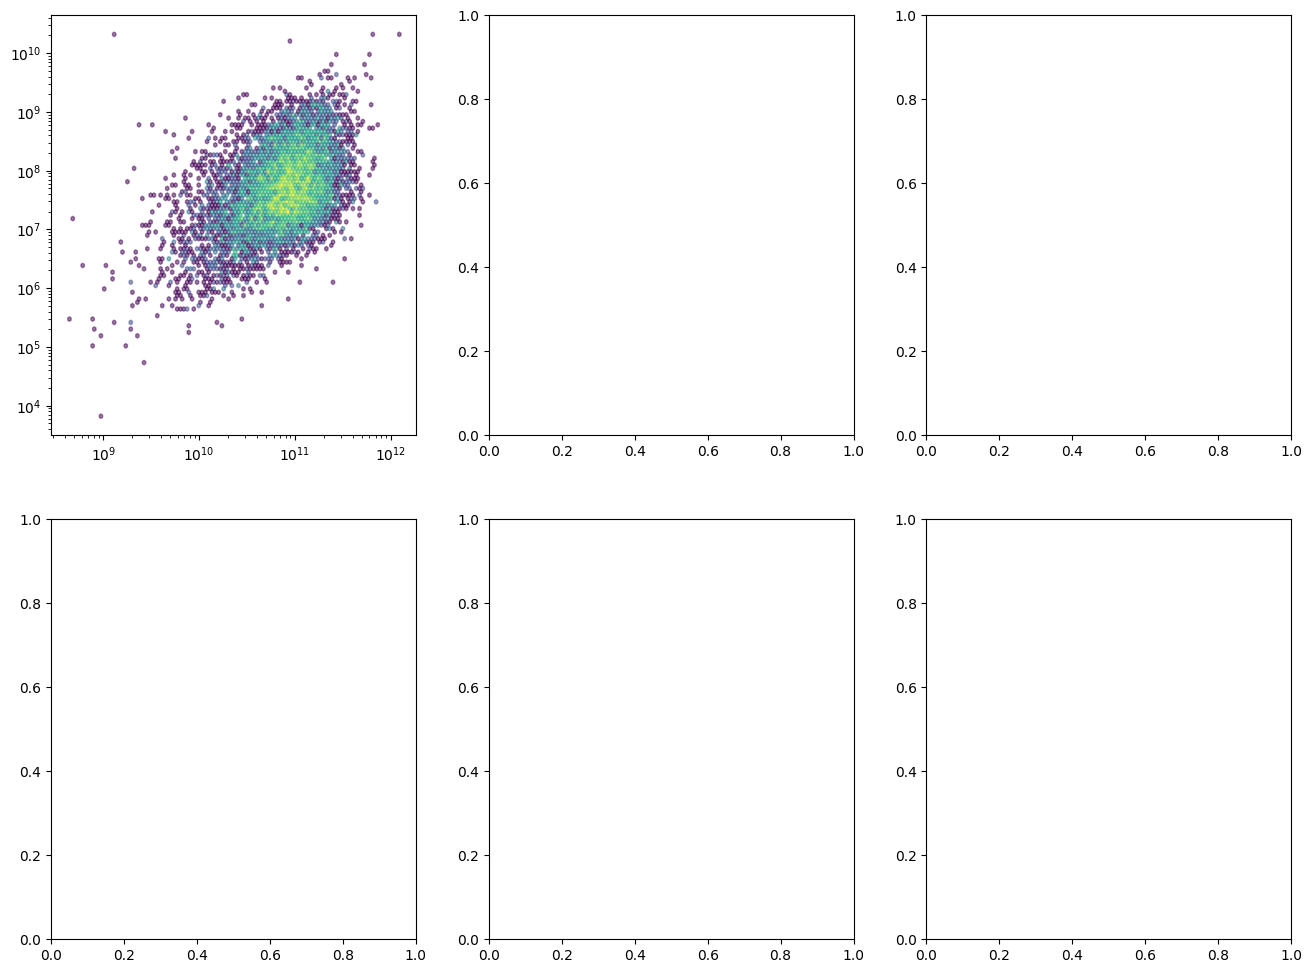

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os


#observations
df_data = pd.read_csv("Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_massBH = 10**df_data['massBH'].to_numpy()
    

#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    print(sim_list[x])
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    print(massBH,stellar_mass)
    axes[i][j].hexbin(data_stellar_mass, data_massBH,bins='log', xscale='log', yscale='log', alpha = 0.5)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


#plt.savefig('Figures/stellarMass_vs_BHMass_withdata')
plt.show()

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


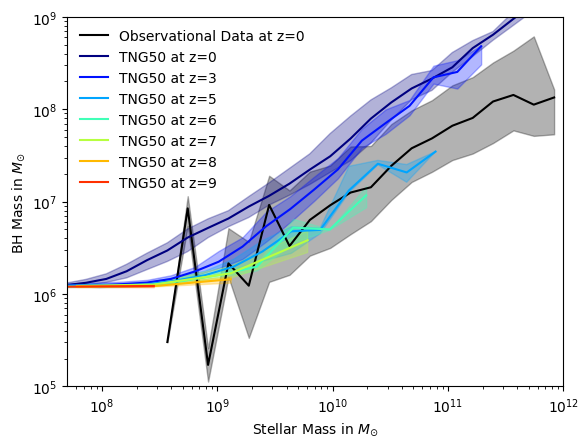

In [34]:
sim_list = np.array(['TNG50'])
#snapshot_num = np.array([99])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])

snapshot_num = np.array([99,25,17,13,11,8,6])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9'])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])



x = 0
bins = [np.logspace(6,12,35),np.logspace(6,12,30),np.logspace(6,12,25),np.logspace(6,12,20),np.logspace(6,12,10),np.logspace(6,12,10),np.logspace(6,12,10),np.logspace(6,12,10)]
colors = plt.cm.jet(np.linspace(0,1,len(snapshot_num)+1))



df_data = pd.read_csv("Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
df_data['stellar mass'] = 10**(df_data['stellar mass'])
df_data['massBH'] = 10**(df_data['massBH'])
group_data = df_data.groupby(pd.cut(df_data['stellar mass'], bins[0]))
plot_centers_data = (bins[0] [:-1] + bins[0] [1:])/2
plot_values_data = group_data['massBH'].median()
plt.plot(plot_centers_data, plot_values_data, label='Observational Data at z=0', color= 'black')
lower_q = group_data['massBH'].quantile(q=0.25)
upper_q = group_data['massBH'].quantile(q=0.75)
plt.fill_between(plot_centers_data, lower_q, upper_q ,alpha=0.3,color= 'black')





while x < len(snapshot_num):
    filename = str("Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename,header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df = df.loc[df['massBH']  != 0]

    group = df.groupby(pd.cut(df['stellar mass'], bins[x]))
    plot_centers = (bins[x] [:-1] + bins[x] [1:])/2
    plot_values = group['massBH'].median()
    plt.plot(plot_centers, plot_values, label=str(sim_list[0])+" at "+str(snapshot_name[x]), color= colors[x])
    #sdt = group['massBH'].std()
    #plt.fill_between(plot_centers, plot_values-sdt, plot_values+sdt ,alpha=0.3)
    lower_q = group['massBH'].quantile(q=0.25)
    upper_q = group['massBH'].quantile(q=0.75)
    plt.fill_between(plot_centers, lower_q, upper_q ,alpha=0.3, color= colors[x])
    x +=1


plt.xlabel(r'Stellar Mass in $M_{\odot}$')
plt.xlim([10**7.7, 10**12])
plt.ylim([1e5, 1e9])
plt.ylabel(r'BH Mass in $M_{\odot}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=10,frameon=False)


plt.savefig('TNG50_BH_Stellar_mass_overtime.jpg')
plt.show()